In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
customer=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Ajio\customer.csv")
delivery=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Ajio\delivery.csv")
orders=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Ajio\orders.csv")
products=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Ajio\products.csv")
rating=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Ajio\ratings.csv")
returns=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Ajio\returns.csv")
transaction=pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Ajio\transaction.csv")


In [27]:
customer.head(2)

,C_ID,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,CS_11000001,Manbir Lala,Male,67,Delhi,Delhi,"Park Ave, 163 , Delhi , Delhi - 529675",9607971039
1,CS_11000002,Radhika More,Female,51,Pune,Maharashtra,"Elm St, 960 , Pune , Maharashtra - 328062",9109249091


In [42]:
delivery.head(2)

,DP_ID,DP_name,DP_Ratings,Percent_Cut
0,DV_61000001,Delhivery,5,25
1,DV_61000002,Ecom Express,4,20


In [31]:
orders.head(2)

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25


In [44]:
products.head(2)


,P_ID,P_Name,Category,Company_Name,Gender,Price
0,PD_21000001,Distressed Stretch Denim Charcoal Faded Jeans,Jeans,Puma,Unisex,1589
1,PD_21000002,Straight Leg Cotton Blend Light Blue Faded Jeans,Jeans,Gap,Men,2211


In [46]:
rating.head(2)


,R_ID,Or_ID,Prod_Rating,Delivery_Service_Rating
0,RT_101000001,OR_31009479,4,5
1,RT_101000002,OR_31001385,2,2


In [57]:
returns.head(2)

,RT_ID,Or_ID,Reason,Return_Refund,Dates
0,RR_301000001,OR_31004141,Wrong Item Shipped,Approved,2023-04-08
1,RR_301000002,OR_31008145,Late Delivery,Rejected,2024-05-13


In [52]:
transaction.head(2)

,Tr_ID,Or_ID,Transaction_Mode,Reward
0,TR_41000001,OR_31002037,Wallet,No
1,TR_41000002,OR_31008376,Wallet,Yes


**Data Combining**

In [65]:
data=pd.merge(left=orders,right= customer,on="C_ID",how= "inner")
data=pd.merge(left=orders,right= delivery,on="DP_ID",how= "inner")
data=pd.merge(left=orders,right= products,on="P_ID",how= "inner")
data=pd.merge(left=orders,right= rating,on="Or_ID",how= "inner")
data=pd.merge(left=orders,right= returns,on="Or_ID",how= "inner")
data=pd.merge(left=orders,right= transaction,on="Or_ID",how= "inner")
data

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,Tr_ID,Transaction_Mode,Reward
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0,TR_41004226,UPI,Yes
1,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,10,AGREEMENT,DV_61000003,10,TR_41004874,Debit Card,No
2,OR_31000005,CS_11009894,PD_21007621,2023-10-26,04:02:44,7,WINDOW,DV_61000001,10,TR_41007053,Wallet,Yes
3,OR_31000006,CS_11004976,PD_21002407,2023-12-09,07:58:24,1,FALL,DV_61000003,25,TR_41009182,Net Banking,No
4,OR_31000007,CS_11009282,PD_21005526,2023-05-12,23:40:21,9,TEAM,DV_61000002,25,TR_41001808,Net Banking,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,OR_31009995,CS_11008874,PD_21000407,2023-02-23,13:38:59,6,TRUTH,DV_61000002,25,TR_41003386,Net Banking,Yes
9996,OR_31009996,CS_11004842,PD_21004878,2024-11-14,18:20:50,5,MILLION,DV_61000005,15,TR_41002317,UPI,No
9997,OR_31009997,CS_11005966,PD_21000725,2023-05-15,03:02:18,4,No Coupon,DV_61000002,0,TR_41002452,Debit Card,No
9998,OR_31009998,CS_11003081,PD_21002144,2024-12-28,17:50:17,6,No Coupon,DV_61000002,0,TR_41007562,Credit Card,No


***EDA***

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Or_ID             10000 non-null  object
 1   C_ID              10000 non-null  object
 2   P_ID              10000 non-null  object
 3   Order_Date        10000 non-null  object
 4   Order_Time        10000 non-null  object
 5   Qty               10000 non-null  int64 
 6   Coupon            10000 non-null  object
 7   DP_ID             10000 non-null  object
 8   Discount          10000 non-null  int64 
 9   Tr_ID             10000 non-null  object
 10  Transaction_Mode  10000 non-null  object
 11  Reward            10000 non-null  object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


In [126]:
data.describe()

,Qty,Discount
count,10000.000000,10000.000000
mean,5.539800,8.944100
std,2.898872,11.789346
min,1.000000,0.000000
25%,3.000000,0.000000
50%,6.000000,0.000000
75%,8.000000,15.000000
max,10.000000,50.000000


## Changing Datatypes

In [130]:
data['Order_Date'] = pd.to_datetime( data.Order_Date , format = '%Y-%m-%d' )

In [137]:
data['Order_Time'] = pd.to_datetime( data.Order_Time , format = '%H:%M:%S' )

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Or_ID             10000 non-null  object        
 1   C_ID              10000 non-null  object        
 2   P_ID              10000 non-null  object        
 3   Order_Date        10000 non-null  datetime64[ns]
 4   Order_Time        10000 non-null  datetime64[ns]
 5   Qty               10000 non-null  int64         
 6   Coupon            10000 non-null  object        
 7   DP_ID             10000 non-null  object        
 8   Discount          10000 non-null  int64         
 9   Tr_ID             10000 non-null  object        
 10  Transaction_Mode  10000 non-null  object        
 11  Reward            10000 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 937.6+ KB


In [79]:
Objects= data.select_dtypes("object")
Objects.head(2)

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Coupon,DP_ID,Tr_ID,Transaction_Mode,Reward
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,No Coupon,DV_61000001,TR_41004226,UPI,Yes
1,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,AGREEMENT,DV_61000003,TR_41004874,Debit Card,No


In [83]:
Int=data.select_dtypes("int64")
Int.head(2)

,Qty,Discount
0,1,0
1,10,10


## Detecting Outliers

In [102]:
maximum =Int.Qty.max()
p99= Int.Qty.quantile(0.99)
p75=Int.Qty.quantile(0.75)
p50=Int.Qty.median()
p25=Int.Qty.quantile(0.25)
minimun=Int.Qty.min()

In [106]:
print("maximum :",maximum)
print("p99 :",p99)
print("p75 :",p75)
print("p50 :",p50)
print("p25 :",p25)
print("minimum :",minimun)

maximum : 10
p99 : 10.0
p75 : 8.0
p50 : 6.0
p25 : 3.0
minimum : 1


## Detecting Outliers

In [112]:
maximum_discount =Int.Discount.max()
p99= Int.Discount.quantile(0.99)
p75=Int.Discount.quantile(0.75)
p50=Int.Discount.median()
p25=Int.Discount.quantile(0.25)
minimun=Int.Discount.min()

In [116]:
print("maximum :",maximum_discount)
print("p99 :",p99)
print("p75 :",p75)
print("p50 :",p50)
print("p25 :",p25)
print("minimum :",minimun)

maximum : 50
p99 : 50.0
p75 : 15.0
p50 : 0.0
p25 : 0.0
minimum : 0


## Analysis On the Given data

#### 1. Total & Average Quantity by Date

In [148]:
sales_by_date = data.groupby('Order_Date')['Qty'].agg(['sum', 'mean']).reset_index()
sales_by_date.head(2)

,Order_Date,sum,mean
0,2023-01-01,28,5.6
1,2023-01-02,67,6.7


#### Plot

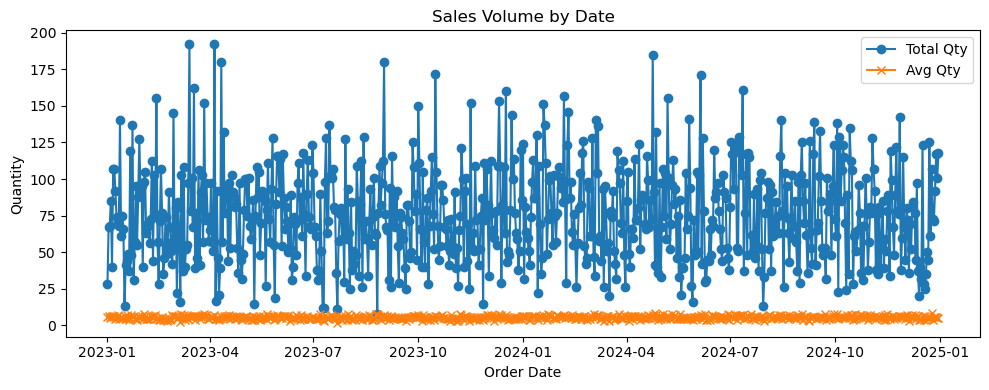

In [151]:
plt.figure(figsize=(10, 4))
plt.plot(sales_by_date['Order_Date'], sales_by_date['sum'], marker='o', label='Total Qty')
plt.plot(sales_by_date['Order_Date'], sales_by_date['mean'], marker='x', label='Avg Qty')
plt.title("Sales Volume by Date")
plt.xlabel("Order Date")
plt.ylabel("Quantity")
plt.legend()
plt.tight_layout()
plt.show()

#### 2. Total & Average Quantity by Hour

In [169]:
data['Hour'] = data['Order_Time'].dt.hour

In [173]:
sales_by_hour = data.groupby('Hour')['Qty'].agg(['sum', 'mean']).reset_index()
sales_by_hour.head(2)

,Hour,sum,mean
0,0,2345,5.596659
1,1,2375,5.588235


### Plot

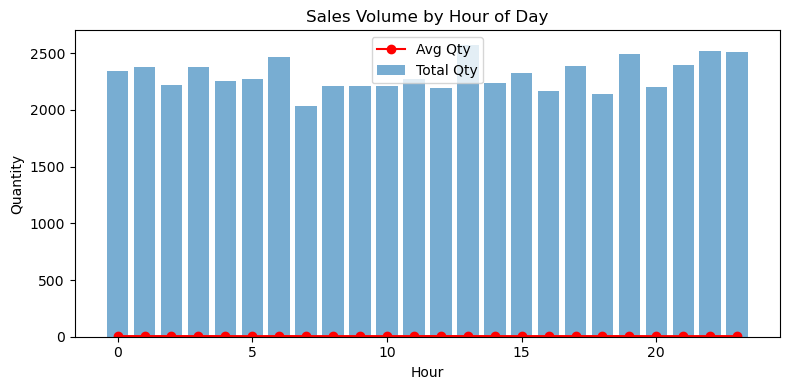

In [175]:
plt.figure(figsize=(8, 4))
plt.bar(sales_by_hour['Hour'], sales_by_hour['sum'], alpha=0.6, label='Total Qty')
plt.plot(sales_by_hour['Hour'], sales_by_hour['mean'], color='red', marker='o', label='Avg Qty')
plt.title("Sales Volume by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Quantity")
plt.legend()
plt.tight_layout()
plt.show()

#### 3. Total & Average Quantity by Product

In [167]:
sales_by_product = data.groupby('P_ID')['Qty'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False).head(10).reset_index()
sales_by_product.head(2)

,P_ID,sum,mean
0,PD_21002451,79,6.583333
1,PD_21003247,70,10.000000


#### Plot

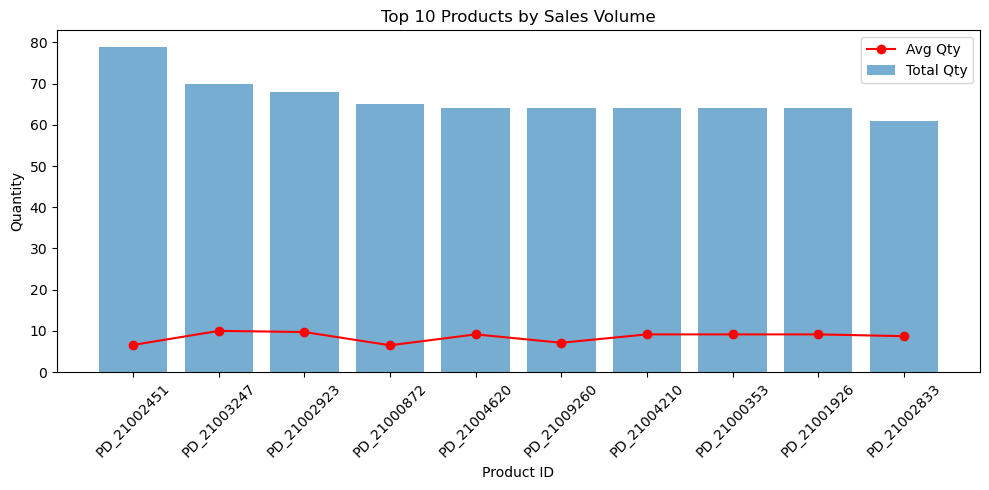

In [178]:
plt.figure(figsize=(10, 5))
plt.bar(sales_by_product['P_ID'], sales_by_product['sum'], alpha=0.6, label='Total Qty')
plt.plot(sales_by_product['P_ID'], sales_by_product['mean'], color='red', marker='o', label='Avg Qty')
plt.title("Top 10 Products by Sales Volume")
plt.xlabel("Product ID")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##   Coupon usage behavior by customer

#### 1. Normalize "Coupon" column (treat "No Coupon" as NaN for analysis)

In [183]:
data['Coupon_Used'] = data['Coupon'].apply(lambda x: x if x != 'No Coupon' else None)

#### 2. Coupon Usage Count by Customer

In [191]:
coupon_usage = data[data['Coupon_Used'].notna()].groupby('C_ID')['Coupon_Used'].count().sort_values(ascending=False).head(10)
coupon_usage.head(2)

C_ID
CS_11000986    10
CS_11008768     8
Name: Coupon_Used, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_20316\86006462.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coupon_usage.index, y=coupon_usage.values, palette='magma')


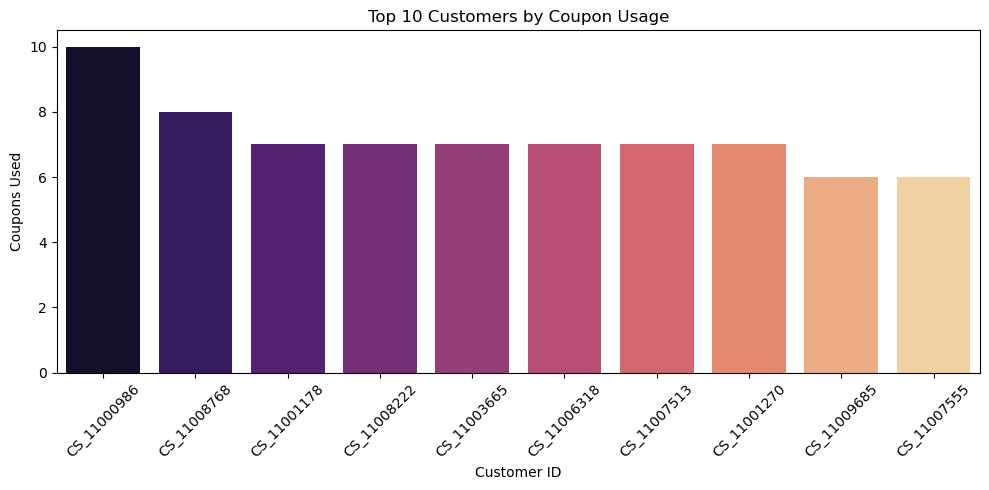

In [193]:
plt.figure(figsize=(10, 5))
sns.barplot(x=coupon_usage.index, y=coupon_usage.values, palette='magma')
plt.title("Top 10 Customers by Coupon Usage")
plt.xlabel("Customer ID")
plt.ylabel("Coupons Used")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. Coupon Usage Rate by Customer (% of orders with coupons)

In [210]:
total_orders = data.groupby('C_ID')['Coupon'].count()
coupon_orders = data[data['Coupon_Used'].notna()].groupby('C_ID')['Coupon_Used'].count()
coupon_usage_rate = (coupon_orders / total_orders).fillna(0).sort_values(ascending=False).head(10)
print("total_orders ",total_orders.head(2))
print("couon_orders ",coupon_orders.head(2))
print("coupon_usages_rate ",coupon_usage_rate.head(2))

total_orders  C_ID
CS_11000003    2
CS_11000004    1
Name: Coupon, dtype: int64
couon_orders  C_ID
CS_11000003    2
CS_11000004    1
Name: Coupon_Used, dtype: int64
coupon_usages_rate  C_ID
CS_11000003    1.0
CS_11005236    1.0
dtype: float64


C:\Users\dell\AppData\Local\Temp\ipykernel_20316\2085190524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coupon_usage_rate.index, y=coupon_usage_rate.values * 100, palette='coolwarm')


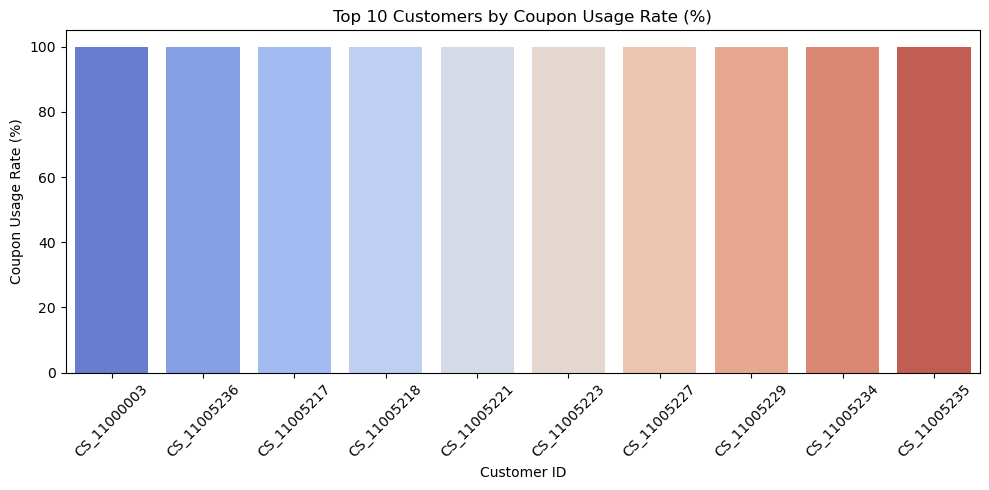

In [198]:
plt.figure(figsize=(10, 5))
sns.barplot(x=coupon_usage_rate.index, y=coupon_usage_rate.values * 100, palette='coolwarm')
plt.title("Top 10 Customers by Coupon Usage Rate (%)")
plt.xlabel("Customer ID")
plt.ylabel("Coupon Usage Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4. Optional: Common Coupons Used

In [201]:
top_coupons = data[data['Coupon_Used'].notna()]['Coupon_Used'].value_counts().head(5)
print("Most commonly used coupons:\n", top_coupons)
top_coupons.head(2)

Most commonly used coupons:
 Coupon_Used
CUT        19
KNOW       19
SCENE      18
COUNTRY    17
MY         16
Name: count, dtype: int64


Coupon_Used
CUT     19
KNOW    19
Name: count, dtype: int64

## Correlation between discounts and reward assignment

In [213]:
data['Reward_Flag'] = data['Reward'].map({'Yes': 1, 'No': 0})

#### Calculate the correlation

In [220]:
correlation = data['Discount'].corr(data['Reward_Flag'])
print(f"Correlation between Discount and Reward assignment: {correlation:.3f}")
correlation

Correlation between Discount and Reward assignment: 0.018


0.017629855847950772

#### Plot: Discount vs Reward (Boxplot)

C:\Users\dell\AppData\Local\Temp\ipykernel_20316\3778639950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Reward', y='Discount', data=data, palette='Set2')


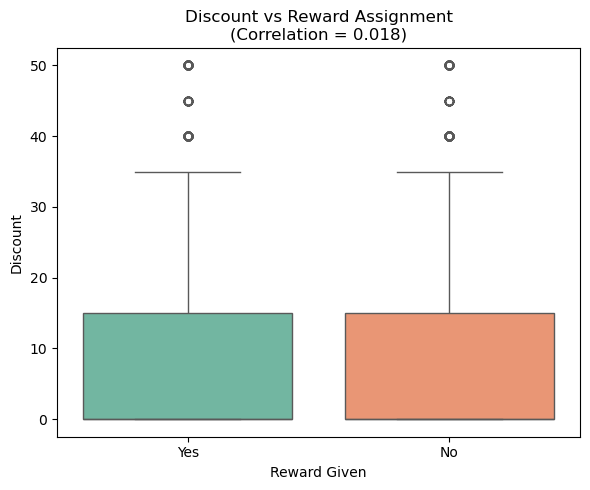

In [225]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Reward', y='Discount', data=data, palette='Set2')
plt.title(f"Discount vs Reward Assignment\n(Correlation = {correlation:.3f})")
plt.xlabel("Reward Given")
plt.ylabel("Discount")
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20316\2398559029.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_rewards.index, y=product_rewards.values, palette='magma', ax=axs[0])
C:\Users\dell\AppData\Local\Temp\ipykernel_20316\2398559029.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Qty', palette='viridis', ax=axs[1])


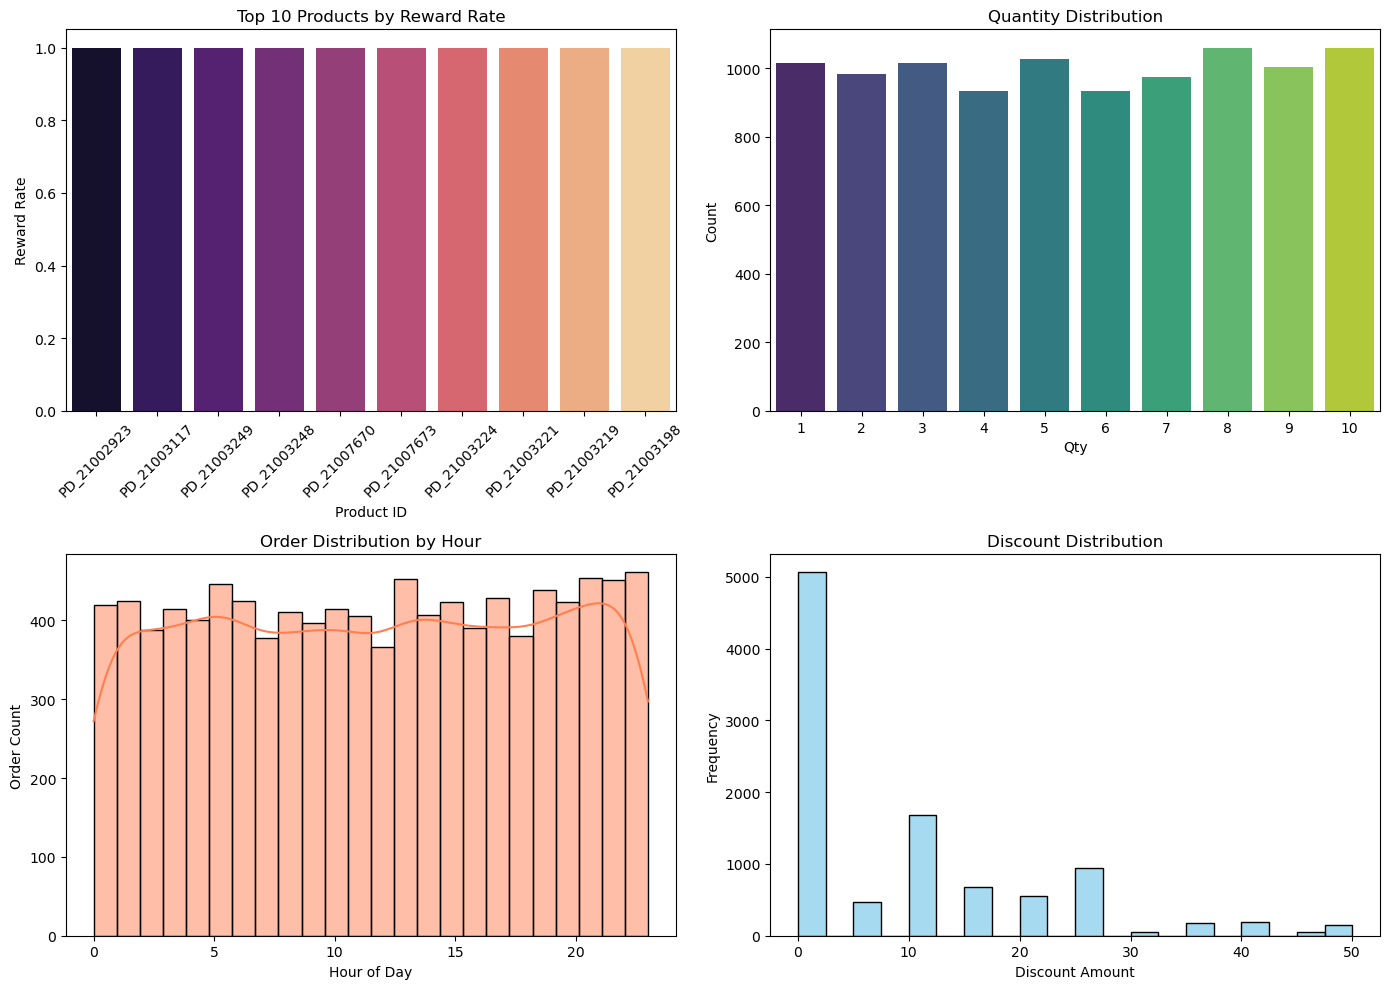

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# --- Plot 1: Top 10 Products by Reward Rate ---
product_rewards = data.groupby('P_ID')['Reward_Flag'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=product_rewards.index, y=product_rewards.values, palette='magma', ax=axs[0])
axs[0].set_title("Top 10 Products by Reward Rate")
axs[0].set_xlabel("Product ID")
axs[0].set_ylabel("Reward Rate")
axs[0].tick_params(axis='x', rotation=45)

# --- Plot 2: Quantity Distribution ---
sns.countplot(data=data, x='Qty', palette='viridis', ax=axs[1])
axs[1].set_title("Quantity Distribution")
axs[1].set_xlabel("Qty")
axs[1].set_ylabel("Count")

# --- Plot 3: Order Distribution by Hour ---
sns.histplot(data=data, x='Hour', bins=24, kde=True, color='coral', ax=axs[2])
axs[2].set_title("Order Distribution by Hour")
axs[2].set_xlabel("Hour of Day")
axs[2].set_ylabel("Order Count")

# --- Plot 4: Discount Distribution ---
sns.histplot(data=data['Discount'], bins=20, color='skyblue', ax=axs[3])
axs[3].set_title("Discount Distribution")
axs[3].set_xlabel("Discount Amount")
axs[3].set_ylabel("Frequency")

# Final layout and save
plt.tight_layout()
plt.savefig("ajio_merged_dashboard_v2.png", dpi=300)
plt.show()